# Manhattan Housing

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

Let's make some cool tools to help us look a this data!

In [139]:
def getTrainTest(dataFrame, frac):
    """Given:
            data as a dataframe dataFrame
            fraction of training data from data frac
            
        Requirements:
            pandas
            numpy
            
    Return a list of train and test dataFrames from dataFrame where frac is the fraction of data used 
    for the training dataframe.
    
    requires: numpy and pandas"""
    
    msk = np.random.rand(len(dataFrame)) < frac
    train = dataFrame[msk]
    test = dataFrame[~msk]
    return [train,test]

def DoRegression(xDat, yDat, printAssumptions=True, xDim=0):
    """
    Given:
        predictor as pandas dataframe or list of dataframes xDat
        target value as a pandas dataframe yDat
        xDim dimension to plot if multi predictors (not working/tested yet)
        
    Requirements:
        pandas
        sklean linear_model
        numpy 
        matplotlib.pyplot
        
    creates a regression object, trains it and
    returns the object, a report as a string and a plot of the fit.
        
    if printAssumptions true then print the assumptions to check for linear regression."""
    
        
    # check if multi or single
    if len(xDat.columns) > 1:
        multiReg = True
    else:
        multiReg = False
      
    # setup x array
    if multiReg:
        X = xDat.values
    else:
        X = xDat.values.reshape(-1,1)
        
    Y = yDat.values.reshape(-1,1)
    
    # create regression obj
    lrObj = lm.LinearRegression()
        
    # train obj
    lrObj.fit(X, Y)
        
    # get report and plot
    report, plot = getRegReport(lrObj, X, Y, xDim=xDim, multiReg=multiReg)
    
    # add assumptions to report string
    assumps = """
    
Check these assumptions:
                        
Single and multivariable:
    Linear relationship
    Multivariate normality or parametric errors check with Kolmogorov-Smirnof test or hist plot
    No auto-correlation a.k.a history matters like stock prices check with Durbin-Watson's d tests null hypothesis that residuals are not linearly auto-correlated
    Homoscedasticity or STD of errors is the same for entire x range
    Rule of thumb: N about >20

Only for Multivariable:
    Little multicollinearity or independent predictors check with correlation matrix of predictors
    
"""
    
    if(printAssumptions):
        report += assumps

    return [report, plot,lrObj]

def DoRegression1D(xDat, yDat, printAssumptions=True):
    """
        Given:
            predictor as pandas dataframe xDat (must be 1D)
            target value as a pandas dataframe yDat
            dimension of x to plot
        
        Requirements:
            pandas
            sklean linear_model
            numpy 
            matplotlib.pyplot
        
        creates a regression object, trains it and
        returns the object, a report as a string and a plot of the fit.
        
        if printAssumptions true then print the assumptions to check for linear regression."""
    
    X = xDat.values.reshape(-1,1)
    Y = yDat.values.reshape(-1,1)
    
    # create regression obj
    lrObj = lm.LinearRegression()
        
    # train obj
    lrObj.fit(X, Y)
        
    # get report and plot
    report, plot = getRegReport(lrObj, X,Y, xDim=0, multiReg=False)
    
    # add assumptions to report string
    assumps = """
    
Check these assumptions:
                        
Single and multivariable:
    Linear relationship
    Multivariate normality or parametric errors check with Kolmogorov-Smirnof test or hist plot
    No auto-correlation a.k.a history matters like stock prices check with Durbin-Watson's d tests null hypothesis that residuals are not linearly auto-correlated
    Homoscedasticity or STD of errors is the same for entire x range
    Rule of thumb: N about >20

Only for Multivariable:
    Little multicollinearity or independent predictors check with correlation matrix of predictors
    
"""
    
    if(printAssumptions):
        report += assumps

    return [report, plot,lrObj]


def getRegReport(lrObj, xvals, yvals, xDim=0, multiReg=False):
    """Given: 
            lr object lrObje,
            yvalues yvals
            predictors xvals
            if multiReg which dimension of x to plot xDim (not working/tested right now)
        
        Requirements:
            pandas
            sklearn linear_model
            numpy
            matplotlib.pyplot
        
        return a report as a string and a pyplot"""
    
    report = ""
    
    # coefficients
    for cof in lrObj.coef_:
        coef = "{} ".format(cof)
    report += "\nCoefficients : "+coef
    
    # mean squared error
    mse = np.mean((lrObj.predict(xvals)-yvals)**2)
    report += "\nMean Squared Error : {}".format(mse)

    # score - coefficient of determination R^2 of the prediction
    score = lrObj.score(xvals, yvals)
    report += "\nScore : {}".format(score)
        
    # create plot
    plt.figure()
    
    if not multiReg:
        plt.scatter(xvals, yvals, color='black')
        plt.plot(xvals, lrObj.predict(xvals), color='blue', linewidth=3)
        
    # multi var plot not working/tested
    #else:
    #    plt.scatter(xvals[:,xDim], yvals, color='black')
    #    plt.plot(xvals[:,xDim], lrObj.predict(xvals), color='blue', linewidth=3)
    
    return [report, plt]  

# Exploratory Data Analysis

Lets import the data and look at what information we have. Doing some exploratory data analysis (EDA)

In [3]:
datFil = "rollingsales_manhattan.xls"
rawData = pd.read_excel(datFil, skiprows=4)
rawData.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693,2013-05-20
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1654656,2013-05-16
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1069162,2013-05-23
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1374637,2013-05-15
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1649565,2013-05-13


In [4]:
rawData.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APART\nMENT\nNUMBER                       object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE\nPRICE                                int64
SALE DATE           

In [5]:
rawData.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,27395.0,27395.000000,27395.000000,27395.000000,27395.000000,27395.000000,27395.000000,27395.000000,2.739500e+04,27395.000000,27395.000000,2.739500e+04
mean,1.0,1109.666728,741.789086,10028.860120,1.766417,0.374995,2.289432,965.715240,9.572026e+03,1493.880270,2.488118,1.848001e+06
std,0.0,465.994469,819.422424,69.959378,14.910835,4.599586,15.747772,3865.774395,3.908281e+04,828.916146,0.891723,1.633228e+07
min,1.0,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,1.0,877.000000,37.000000,10016.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1900.000000,2.000000,0.000000e+00
50%,1.0,1047.000000,1007.000000,10019.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1928.000000,2.000000,4.500000e+05
75%,1.0,1411.000000,1233.000000,10027.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,1973.000000,4.000000,1.150000e+06
max,1.0,2250.000000,9117.000000,10463.000000,1328.000000,604.000000,1349.000000,213650.000000,1.970736e+06,2013.000000,4.000000,1.307965e+09


# Clean Data

We are interested in the sale price let's come up with some predictors. Our first guess is gross square feet should be a good predictor. 

In [6]:
# clean the data
conditions = (rawData['GROSS SQUARE FEET']>0) & (rawData['SALE\nPRICE']>0) & (rawData['LAND SQUARE FEET']>0)
cleanDat = rawData[conditions]

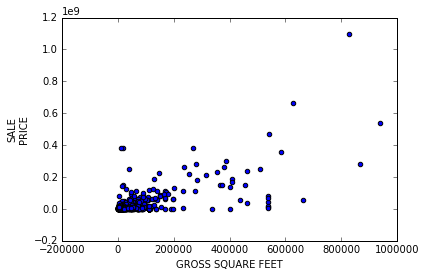

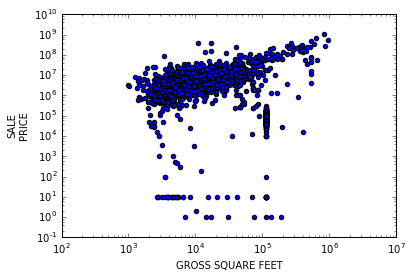

In [7]:
cleanDat.plot(x='GROSS SQUARE FEET',y='SALE\nPRICE',kind='Scatter')
cleanDat.plot(x='GROSS SQUARE FEET',y='SALE\nPRICE',kind='Scatter',logy=True,logx=True)

Here we have removed all the data that is missing sale price, gross square feet, and land square feet. Let's keep playing with the data and modeling it. 

We need to define our training and test sets first.

# Model Sale Price

In [8]:
# split data into training and test set
trainTestFrac = 0.8
trainDat, testDat = getTrainTest(cleanDat, trainTestFrac)


Coefficients : 265.86729777404315 
Mean Squared Error : 1280979436149470.8
Score : 0.21826313033954794


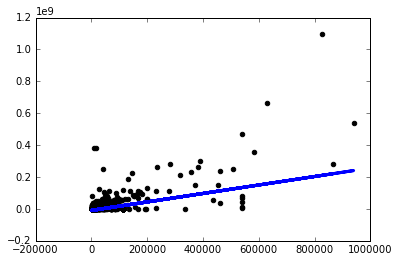

In [10]:
tx = trainDat['GROSS SQUARE FEET']
ty = trainDat['SALE\nPRICE']

report, plot, obj = DoRegression1D(tx,ty, printAssumptions=False)
print(report)
plot.show()

Not the best let's try the log.


Coefficients : -0.8538851310877101 
Mean Squared Error : 6.564083249716814
Score : 0.19401713828109068


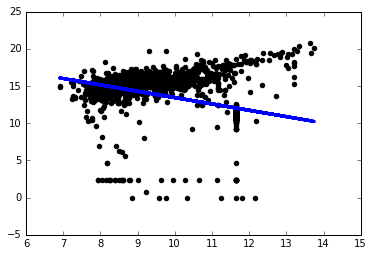

In [11]:
tx = trainDat['GROSS SQUARE FEET']
ty = trainDat['SALE\nPRICE']

tx = tx.apply(np.log)
ty = ty.apply(np.log)

report, plot, obj = DoRegression1D(tx,ty, printAssumptions=False)
print(report)
plot.show()

Bad fit but the data looks better. Let's focus on apartments.


Coefficients : 0.8890029836003339 
Mean Squared Error : 4.937511223831305
Score : 0.13439425951416484
    
Check these assumptions:
                        
Single and multivariable:
    Linear relationship
    Multivariate normality or parametric errors check with Kolmogorov-Smirnof test or hist plot
    No auto-correlation a.k.a history matters like stock prices check with Durbin-Watson's d tests null hypothesis that residuals are not linearly auto-correlated
    Homoscedasticity or STD of errors is the same for entire x range
    Rule of thumb: N about >20

Only for Multivariable:
    Little multicollinearity or independent predictors check with correlation matrix of predictors
    



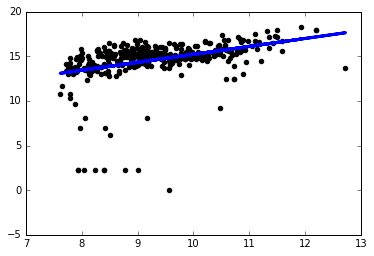

In [14]:
tmpDat = trainDat[(trainDat['COMMERCIAL UNITS']==0)&(trainDat['BUILDING CLASS CATEGORY'].str.contains('APARTMENT'))]

tx = tmpDat['GROSS SQUARE FEET']
ty = tmpDat['SALE\nPRICE']

tx = tx.apply(np.log)
ty = ty.apply(np.log)

report, plot, obj = DoRegression1D(tx,ty, printAssumptions=True)
print(report)
plot.show()


Let's try the model out on the test set.


Coefficients : 0.8890029836003339 
Mean Squared Error : 4.20408963277568
Score : 0.11083562339741437


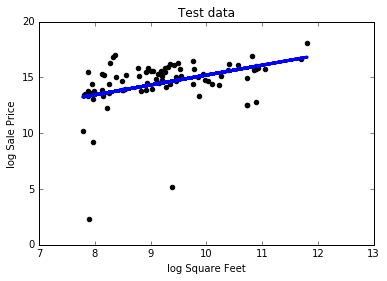

In [19]:
tmpDat = testDat[(testDat['COMMERCIAL UNITS']==0)&(testDat['BUILDING CLASS CATEGORY'].str.contains('APARTMENT'))]

tx = tmpDat['GROSS SQUARE FEET']
ty = tmpDat['SALE\nPRICE']

tx = tx.apply(np.log)
ty = ty.apply(np.log)

report, plot = getRegReport(obj,tx.values.reshape(-1,1),ty.values.reshape(-1,1))
print(report)
plot.ylabel('log Sale Price')
plot.xlabel('log Square Feet')
plot.title('Test data')
plot.show()

In [140]:
# manual multi variable
tmpDat = testDat[(testDat['COMMERCIAL UNITS']==0)&(testDat['BUILDING CLASS CATEGORY'].str.contains('APARTMENT'))]

tx = pd.concat([tmpDat['GROSS SQUARE FEET'],tmpDat['YEAR BUILT']],axis=1,keys=['gross','land'])
ty = tmpDat['SALE\nPRICE']

tx = tx.apply(np.log)
ty = ty.apply(np.log)

X = tx.values
Y = ty.values.reshape(-1, 1)

# create regression obj
lrObj = lm.LinearRegression()
        
# train obj
lrObj.fit(X, Y)

lrObj.coef_

array([[ 0.73066711, -0.2633398 ]])

In [141]:
# testing function coefficient should be same as above

DoRegression(tx, ty, printAssumptions=True, xDim=0)

["\nCoefficients : [ 0.73066711 -0.2633398 ] \nMean Squared Error : 4.177802805789793\nScore : 0.11639528367381391\n    \nCheck these assumptions:\n                        \nSingle and multivariable:\n    Linear relationship\n    Multivariate normality or parametric errors check with Kolmogorov-Smirnof test or hist plot\n    No auto-correlation a.k.a history matters like stock prices check with Durbin-Watson's d tests null hypothesis that residuals are not linearly auto-correlated\n    Homoscedasticity or STD of errors is the same for entire x range\n    Rule of thumb: N about >20\n\nOnly for Multivariable:\n    Little multicollinearity or independent predictors check with correlation matrix of predictors\n    \n",
 <module 'matplotlib.pyplot' from '/home/nick/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)]